Cricket League Evals EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
cricket_data = pd.read_csv('data/cricket_data.csv')

print(cricket_data.columns)

C:\Users\Leigh\AppData\Local\Temp\ipykernel_19704\3665670026.py:1: DtypeWarning: Columns (1,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  cricket_data = pd.read_csv('data/cricket_data.csv')


Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'over', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'ball_in_over', 'extra_ball',
       'balls_remaining', 'runs_scored_yet', 'wicket', 'wickets_lost_yet',
       'innings1_total', 'innings2_total', 'target', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', '.groups', 'league',
       'year'],
      dtype='object')


columns included in model: [season, innings, target, balls_remaining, runs_scored_yet, wickets_lost_yet, venue, striker, bowler, league]

response: runs_off_bat


season:

In [ ]:
cricket_data.groupby(['league', 'year'])['match_id'].nunique().sum() # total games in all data

np.int64(2369)

In [33]:
cricket_data.groupby(['league', 'year'])['match_id'].nunique() # games per season / league

league  year
BBL     2011     27
        2012     28
        2013     34
        2014     34
        2015     32
        2016     35
        2017     43
        2018     59
        2019     61
        2020     61
        2021     60
        2022     61
        2023     41
CPL     2013     23
        2014     27
        2015     32
        2016     29
        2017     34
        2018     33
        2019     34
        2020     33
        2021     33
        2022     31
        2023     32
        2024     11
IPL     2007     58
        2009    117
        2011     73
        2012     74
        2013     76
        2014     60
        2015     59
        2016     60
        2017     59
        2018     60
        2019     60
        2020     60
        2021     60
        2022     74
        2023     74
        2024     71
PSL     2015     23
        2016     24
        2017     33
        2018     34
        2019     28
        2020     18
        2021     54
        2022     34
       

innings:

In [34]:
cricket_data.groupby(['match_id', 'year', 'league'])['innings'].max().value_counts()



innings
2    2351
1      18
Name: count, dtype: int64

In [38]:
cricket_data.groupby(['match_id', 'year', 'league']).filter(lambda x: x['innings'].max() == 1).groupby(['year', 'league']).nunique()

match_id  season  start_date  venue  innings  over  ball  \
year league                                                             
2011 IPL            1       1           1      1        1    11     7   
2013 BBL            1       1           1      1        1     6     7   
2015 IPL            1       1           1      1        1    20     8   
2016 CPL            1       1           1      1        1    10     7   
     PSL            1       1           1      1        1    16     7   
2017 CPL            1       1           1      1        1     9     7   
2019 BBL            1       1           1      1        1     7     6   
     CPL            1       1           1      1        1    13     8   
     PSL            1       1           1      1        1    17     7   
2020 CPL            1       1           1      1        1     6     7   
2022 BBL            1       1           1      1        1    13     7   
     SAT            2       1           1      2        1    15     7   
2023 BBL            1       1           1      1        1     7     7   
     CPL            2       1           1      1        1     5     8   
     IPL            1       1           1      1        1    20     8   
     SAT            1       1           1      1        1     5     7   

             batting_team  bowling_team  striker  ...  wides  noballs  byes  \
year league                                       ...                         
2011 IPL                1             1        5  ...      1        1     0   
2013 BBL                1             1        2  ...      1        0     0   
2015 IPL                1             1        8  ...      1        1     2   
2016 CPL                1             1        4  ...      2        0     0   
     PSL                1             1        5  ...      2        0     0   
2017 CPL                1             1        3  ...      1        0     0   
2019 BBL                1             1        4  ...      0        0     0   
     CPL                1             1        5  ...      2        0     0   
     PSL                1             1        8  ...      1        0     0   
2020 CPL                1             1        2  ...      1        0     0   
2022 BBL                1             1        8  ...      1        0     0   
     SAT                2             2       11  ...      1        1     0   
2023 BBL                1             1        4  ...      1        0     0   
     CPL                2             2        6  ...      2        1     0   
     IPL                1             1        8  ...      2        0     0   
     SAT                1             1        4  ...      1        0     0   

             legbyes  penalty  wicket_type  player_dismissed  \
year league                                                    
2011 IPL           1        0            2                 3   
2013 BBL           1        0            1                 1   
2015 IPL           1        0            3                 7   
2016 CPL           2        0            2                 2   
     PSL           1        0            1                 3   
2017 CPL           1        0            1                 1   
2019 BBL           1        0            2                 2   
     CPL           1        0            2                 4   
     PSL           2        0            2                 6   
2020 CPL           1        0            0                 0   
2022 BBL           2        0            2                 6   
     SAT           2        0            2                 7   
2023 BBL           0        0            2                 2   
     CPL           1        0            2                 3   
     IPL           0        0            3                 7   
     SAT           0        0            2                 2   

             other_wicket_type  other_player_dismissed  .groups  
year league                                             

target:

(array([1.34000e+02, 1.99000e+03, 9.40800e+03, 4.46770e+04, 1.30370e+05,
        2.03662e+05, 1.19589e+05, 3.88120e+04, 5.89700e+03, 2.52000e+03]),
 array([ 20. ,  46.8,  73.6, 100.4, 127.2, 154. , 180.8, 207.6, 234.4,
        261.2, 288. ]),
 <BarContainer object of 10 artists>)

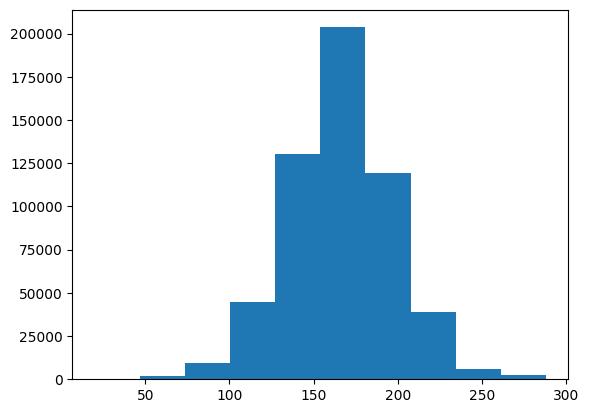

In [39]:
plt.hist(cricket_data['target'])

In [40]:
cricket_data['target'].describe()

count    557059.000000
mean        165.777980
std          30.851527
min          20.000000
25%         147.000000
50%         166.000000
75%         185.000000
max         288.000000
Name: target, dtype: float64

balls remaining:

(array([44100., 52585., 55172., 56533., 57060., 57536., 57740., 58280.,
        58520., 59533.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

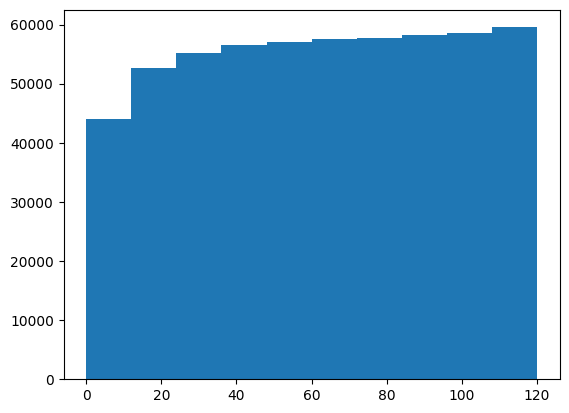

In [41]:
plt.hist(cricket_data['balls_remaining'])

runs_scored_yet

In [42]:
cricket_data['runs_scored_yet'].describe()

count    557059.000000
mean         75.049465
std          48.573728
min           0.000000
25%          35.000000
50%          71.000000
75%         111.000000
max         287.000000
Name: runs_scored_yet, dtype: float64

wickets_lost_yet - how many times has the team gotten out to end the inning (as opposed to reaching 20 overs)

In [43]:
cricket_data['wickets_lost_yet'].describe()

count    557059.000000
mean          2.530818
std           2.134725
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: wickets_lost_yet, dtype: float64

venue

In [44]:
cricket_data.groupby('league')['venue'].nunique()

league
BBL    32
CPL    17
IPL    58
PSL    10
SAT     6
Name: venue, dtype: int64

striker

In [45]:
cricket_data.groupby('league')['striker'].nunique()

league
BBL    454
CPL    366
IPL    674
PSL    343
SAT    129
Name: striker, dtype: int64

bowler

In [46]:
cricket_data.groupby('league')['bowler'].nunique()

league
BBL    342
CPL    263
IPL    531
PSL    246
SAT     98
Name: bowler, dtype: int64

runs off bat

(array([2.23584e+05, 2.05886e+05, 0.00000e+00, 3.72880e+04, 0.00000e+00,
        2.20200e+03, 6.01180e+04, 0.00000e+00, 1.02000e+02, 2.78790e+04]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

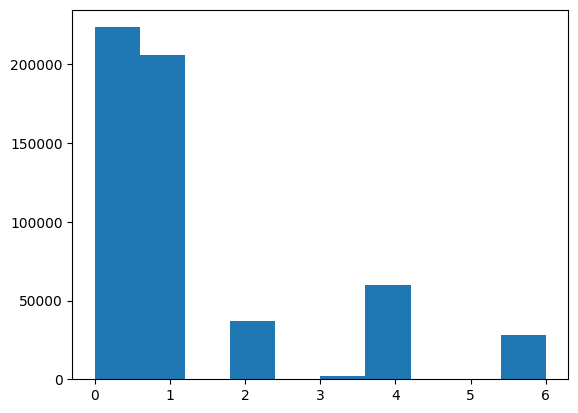

In [47]:
plt.hist(cricket_data['runs_off_bat'])

data cleaning
- drop years before 2011 (2007 and 2009)
    - continuous data since 2011 for IPL and BBL (but no 2024 for BBL)
    - CPL doesn't start until 2013, continous through 2024
    - PSL doesn't start till 2015, through 2023
    - SAT doesn't start until 2022, through 2023

- do we want partial games ? 
    - 18 games which only reach one inning

- drop runs off bat worth 3 and 5



